# Exact solution for transverse Ising model


## Jordan-Wigner Transformation
This transformation maps the spin raising and lowering operators into fermion creation and annihilation operators. For detail, raising and lowering operators $S^{\pm}$ work as

\begin{align}
    S^+|\downarrow\rangle = |\uparrow\rangle \quad , \quad S^-|\uparrow\rangle = |\downarrow\rangle
\end{align}

and the creation and annihilation operators $c^{\pm}$ work as

\begin{align}
    c^+|0\rangle = |1\rangle \quad , \quad c^-|1\rangle = |0\rangle
\end{align}

the state $|0\rangle$ means there is no fermion, and state $|1\rangle$ means there is a fermion. Now, let us see some property of raising and lowering operators, first the operators look like (here we let $\hbar$ = 1)

\begin{align}
    S^+ = S^x + iS^y = \frac{\sigma^{x}+i\sigma^{y}}{2} = \left(\begin{array}{cc}
                                0 & 1 \\
                                0 & 0
                                \end{array}\right) \quad , \quad
    S^- = S^x - iS^y = \frac{\sigma^{x}-i\sigma^{y}}{2} = \left(\begin{array}{cc}
                                0 & 0 \\
                                1 & 0
                                \end{array}\right)
\end{align}

and the relation between $S^{\pm}$ is

\begin{align}
    \left[ S^{\pm}, S^{\pm} \right] = 0 \quad , \quad \{S^-, S^+\} = 1
\end{align}

The whole story about Jordan-Wigner transformation is to find the relations about

\begin{align}
    S^+\rightarrow c^+_j = c_j^{\dagger} \quad , \quad S^-\rightarrow c^-_j = c_j
\end{align}

After the transformation, we require that $c_{j}$ should obey the following rules. $|\Omega_c\rangle$ is the vacuum state which looks like $|00\cdots 00\rangle$.

\begin{align}
    \{ c_{i}, c_{j} \} = 0 \quad , \quad \{ c_{i}, c_{j}^{\dagger}\} = \delta_{ij} \quad , \quad c_{i}|\Omega_c\rangle = 0
\end{align}

Notice that $S^{\pm}$ are local operators but $c_j$, $c_j^{\dagger}$ are global operators, the antisymmetry property $\{ c_{i}, c_{j} \} = 0$ is the most import difference between $S^{\pm}$ and $c_j$, $c_j^{\dagger}$. In order to satisfy this condition, the transformation is

\begin{align}
    c_{j} = \left(\bigotimes_{l<j}\sigma^{z}_{l}\right)\otimes S^-_j\otimes \left(\bigotimes_{j<l}\mathbb{I}_{l}\right), \qquad c_{j}^{\dagger} = \left(\bigotimes_{l<j}\sigma^{z}_{l}\right)\otimes S^+_j\otimes \left(\bigotimes_{j<l}\mathbb{I}_{l}\right)
\end{align}

Let's see a concrete example that show how the transformation makes $\{ S^{\pm}, S^{\pm}\} \neq 0$ into $\{ c_{i}, c_{j} \} = 0$. Suppose a system only with three fermions which denote as 1, 2, 3, then we can write

\begin{align}
    c_2 = \sigma^{z}_1\otimes S^-_2 \otimes \mathbb{I}_{3}
    \quad , \quad
    c_3 = \sigma^{z}_1\otimes \sigma^{z}_2 \otimes S^-_3
\end{align}

then the $\{ c_{2}, c_{3} \}$ is

\begin{align}
    \{ c_{2}, c_{3} \} = c_{2}c_{3} + c_{3}c_{2}
    &= \mathbb{I}_{1} \otimes S^-_2\sigma^{z}_2 \otimes S^-_3 + \mathbb{I}_{1} \otimes \sigma^{z}_2 S^-_2 \otimes S^-_3 \\
    &= \mathbb{I}_{1} \otimes (S^-_2\sigma^{z}_2 + \sigma^{z}_2 S^-_2) \otimes S^-_3 \\
    & = \mathbb{I}_{1} \otimes 0 \otimes S^-_3 = 0
\end{align}

In [1]:
import matplotlib.pyplot as plt
from src import *
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.tools.visualization import array_to_latex

Fermionic SWAP gate (fSWAP) looks like

In [ ]:
qc = QuantumCircuit(2)
fSWAP(qc, 0, 1)
array_to_latex(Operator(qc))

In [ ]:
qc.draw("mpl")

## Fourier Transform

In [ ]:
qc = QuantumCircuit(2)
F0(qc, 0, 1)
array_to_latex(Operator(qc))

In [ ]:
qc.draw("mpl")

In [ ]:
qc = QuantumCircuit(2)
F1(qc, 0, 1)
array_to_latex(Operator(qc))

In [ ]:
qc.draw("mpl")

In [ ]:
from qiskit import QuantumRegister, QuantumCircuit
q = QuantumRegister(4, "q")
qc = QuantumCircuit(4)
Udisg(qc,0,q[0],q[1],q[2],q[3])
qc.draw("mpl")

In [ ]:
array_to_latex(Operator(qc))

In [ ]:
q = QuantumRegister(2, "q")
qc = QuantumCircuit(2)
lam = 0
k=1
n=4
th1= np.arccos((lam+np.cos(2*pi*k/n))/np.sqrt((lam+np.cos(2*pi*k/n))**2+np.sin(2*pi*k/n)**2))
B(qc,q[0],q[1],th1)
qc.draw("mpl")

In [15]:
print(th1)

1.5707963267948966


In [ ]:
array_to_latex(Operator(qc))

In [ ]:
q = QuantumRegister(4, "q")
qc = QuantumCircuit(4)
DFT(qc, q[0],q[1],q[2],q[3])
qc.draw("mpl")

In [ ]:
array_to_latex(Operator(qc))

In [40]:
from qiskit import Aer, execute, ClassicalRegister, transpile, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)
from qiskit.visualization import plot_histogram

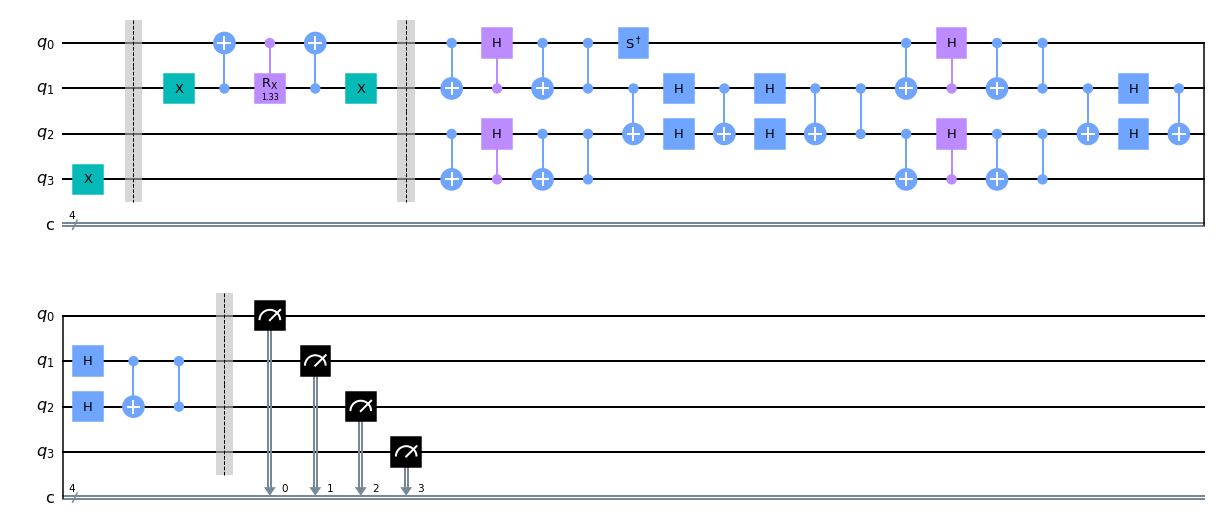

In [12]:
q = QuantumRegister(4, "q")
c = ClassicalRegister(4, "c")
Udis = QuantumCircuit(q, c)
# Udis.draw("mpl")
# plt.show()
ini = QuantumCircuit(q, c)
mes = QuantumCircuit(q, c)
Isex = QuantumCircuit(q, c)
lam = 0.25
Ising(Isex,ini, Udis ,mes,lam,q[0],q[1],q[2],q[3],c[0],c[1],c[2],c[3])
Isex.draw("mpl")

$\lambda$:  0.0 , $<\sigma_{z}>$:  0.0068359375
$\lambda$:  0.25 , $<\sigma_{z}>$:  0.1162109375
$\lambda$:  0.5 , $<\sigma_{z}>$:  0.1982421875
$\lambda$:  0.75 , $<\sigma_{z}>$:  0.3037109375
$\lambda$:  1.0 , $<\sigma_{z}>$:  0.8359375
$\lambda$:  1.25 , $<\sigma_{z}>$:  0.8681640625
$\lambda$:  1.5 , $<\sigma_{z}>$:  0.923828125
$\lambda$:  1.75 , $<\sigma_{z}>$:  0.9384765625


<Figure size 432x288 with 0 Axes>

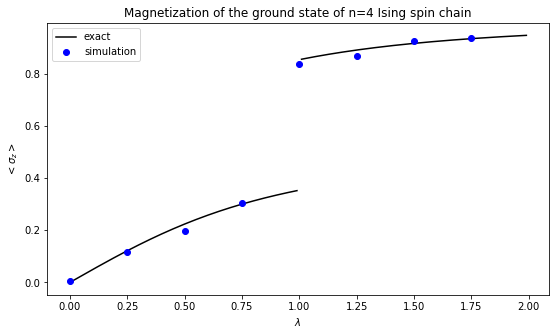

<Figure size 432x288 with 0 Axes>

In [10]:
# use local simulator
shots = 1024
backend = Aer.get_backend('aer_simulator')
mag_sim = []
for i in range(8):
    q = QuantumRegister(4, "q")
    c = ClassicalRegister(4, "c")
    Udis = QuantumCircuit(q, c)
    # Udis.draw("mpl")
    # plt.show()
    ini = QuantumCircuit(q, c)
    mes = QuantumCircuit(q, c)
    Isex = QuantumCircuit(q, c)
    # Isex.draw("mpl")
    # plt.show()

    lam = i*0.25
    Ising(Isex,ini, Udis ,mes,lam,q[0],q[1],q[2],q[3],c[0],c[1],c[2],c[3])
    # ini.draw("mpl")
    # plt.show()
    # Udis.draw("mpl")
    # plt.show()
    # mes.draw("mpl")
    # plt.show()
    # if i == 0:
    #     Isex.draw("mpl")
    #     plt.savefig("./quantum_circuit_for_1D_4_spin_ising_model.png")
    #     plt.show()
    #     plt.clf()
    #     # plt.show()

    job = execute(Isex, backend, shots=shots)
    result = job.result()
    counts = result.get_counts()

    r1 = list(counts.keys())
    r2 = list(counts.values())
    M=0
    for j in range(0,len(r1)):
        M=M+(4-2*digit_sum(r1[j]))*r2[j]/shots
    print("$\lambda$: ",lam,", $<\sigma_{z}>$: ",M/4)
    mag_sim.append(M/4)

vexact = np.vectorize(exact)
plot_Mag_of_ground_state(vexact, mag_sim)

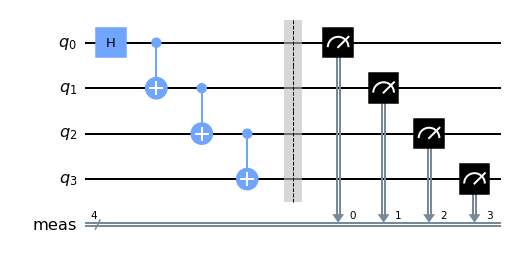

In [45]:
# System Specification
n_qubits = 4
circ = QuantumCircuit(n_qubits)

# Test Circuit
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure_all()
circ.draw('mpl')

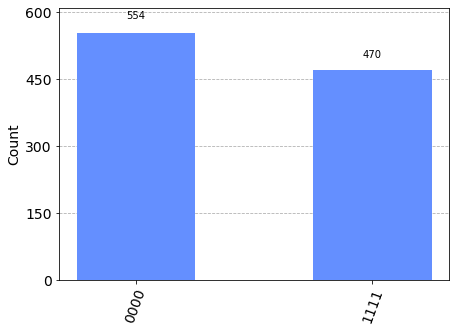

In [46]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ).result()
plot_histogram(result_ideal.get_counts(0))

In [55]:
# Example error probabilities
p_reset = 0.01
p_meas = 0.01
p_gate1 = 0.01

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u']
  Instructions with noise: ['measure', 'u', 'cx', 'reset']
  All-qubits errors: ['reset', 'measure', 'u', 'cx']


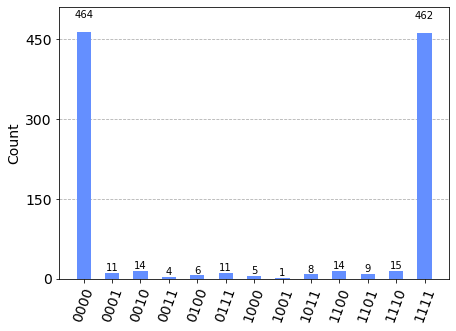

In [56]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)

# Transpile circuit for noisy basis gates
circ_tnoise = transpile(circ, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip)

$\lambda$:  0.0 , $<\sigma_{z}>$:  -0.01220703125
$\lambda$:  0.25 , $<\sigma_{z}>$:  0.0546875
$\lambda$:  0.5 , $<\sigma_{z}>$:  0.1396484375
$\lambda$:  0.75 , $<\sigma_{z}>$:  0.16748046875
$\lambda$:  1.0 , $<\sigma_{z}>$:  0.5537109375
$\lambda$:  1.25 , $<\sigma_{z}>$:  0.560546875
$\lambda$:  1.5 , $<\sigma_{z}>$:  0.58544921875
$\lambda$:  1.75 , $<\sigma_{z}>$:  0.5927734375


<Figure size 432x288 with 0 Axes>

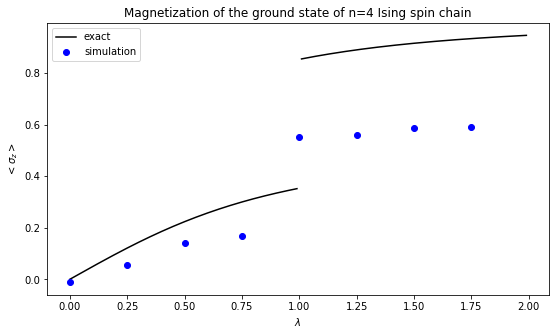

<Figure size 432x288 with 0 Axes>

In [57]:
# simulation with noise
shots = 1024
sim_noise = AerSimulator(noise_model=noise_bit_flip)
mag_sim = []
for i in range(8):
    q = QuantumRegister(4, "q")
    c = ClassicalRegister(4, "c")
    Udis = QuantumCircuit(q, c)
    # Udis.draw("mpl")
    # plt.show()
    ini = QuantumCircuit(q, c)
    mes = QuantumCircuit(q, c)
    Isex = QuantumCircuit(q, c)
    # Isex.draw("mpl")
    # plt.show()

    lam = i*0.25
    Ising(Isex,ini, Udis ,mes,lam,q[0],q[1],q[2],q[3],c[0],c[1],c[2],c[3])
    # ini.draw("mpl")
    # plt.show()
    # Udis.draw("mpl")
    # plt.show()
    # mes.draw("mpl")
    # plt.show()
    # if i == 0:
    #     Isex.draw("mpl")
    #     plt.savefig("./quantum_circuit_for_1D_4_spin_ising_model.png")
    #     plt.show()
    #     plt.clf()
    #     # plt.show()

    circ_tnoise = transpile(Isex, sim_noise)
    result_bit_flip = sim_noise.run(circ_tnoise).result()
    counts = result_bit_flip.get_counts()

    r1 = list(counts.keys())
    r2 = list(counts.values())
    M=0
    for j in range(0,len(r1)):
        M=M+(4-2*digit_sum(r1[j]))*r2[j]/shots
    print("$\lambda$: ",lam,", $<\sigma_{z}>$: ",M/4)
    mag_sim.append(M/4)

vexact = np.vectorize(exact)
plot_Mag_of_ground_state(vexact, mag_sim)

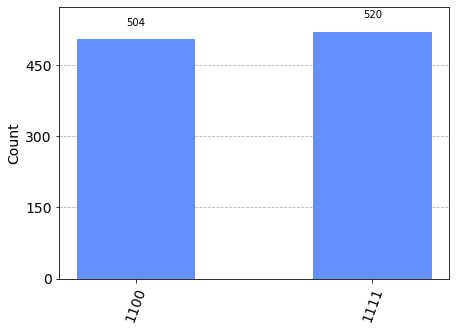

In [39]:
shots = 1024
backend = Aer.get_backend('aer_simulator')
q = QuantumRegister(4, "q")
qc = QuantumCircuit(4)
# qc.x(0)
# qc.x(1)
qc.x(2)
qc.x(3)
Udisg(qc,0,q[0],q[1],q[2],q[3])
Udis_dagger = qc.inverse()
Udis_dagger.measure_all()
job = execute(Udis_dagger, backend, shots=shots)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

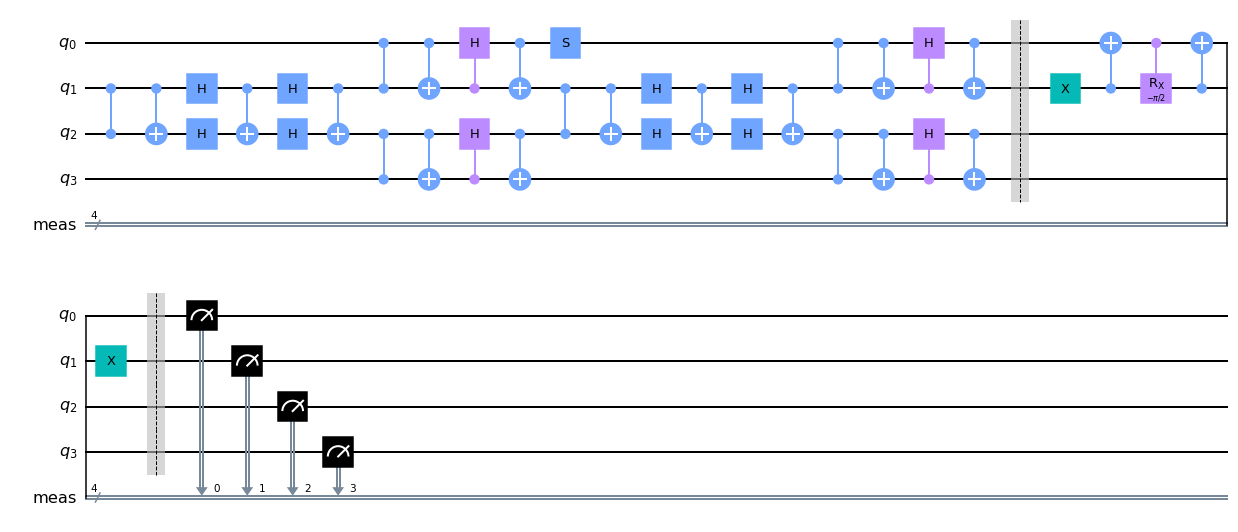

In [11]:
Udis_dagger.draw("mpl")

<Figure size 432x288 with 0 Axes>

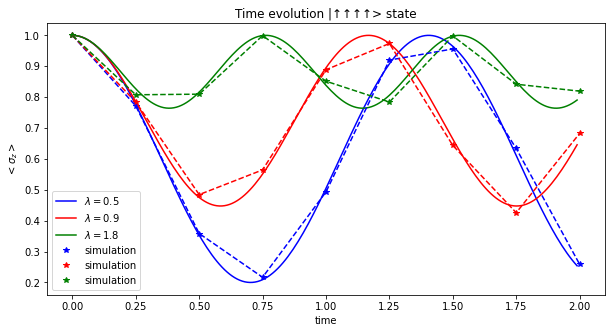

<Figure size 432x288 with 0 Axes>

In [13]:
# use local simulator
shots = 1024
backend = Aer.get_backend('qasm_simulator')
# We compute the time evolution for lambda=0.5,0.9 and 1.8
nlam=3
magt_sim=[[] for _ in range(nlam)]
lam0=[0.5,0.9,1.8]
for j in range(nlam):
    lam=lam0[j]
    for i in range(9):
        q = QuantumRegister(4, "q")
        c = ClassicalRegister(4, "c")
        Udis = QuantumCircuit(q, c)
        # Udis.draw("mpl")
        # plt.show()
        ini = QuantumCircuit(q, c)
        mes = QuantumCircuit(q, c)
        Isex_time = QuantumCircuit(q, c)

        t = i * 0.25

        Ising_time(Isex_time, ini, Udis, mes, lam, t, q[0], q[1], q[2], q[3], c[0], c[1], c[2], c[3])

        job = execute(Isex_time, backend, shots=shots)
        result = job.result()
        counts = result.get_counts()
        r1 = list(counts.keys())
        r2 = list(counts.values())
        M = 0
        for k in range(0, len(r1)):
            M = M + (4 - 2 * digit_sum(r1[k])) * r2[k] / shots
        magt_sim[j].append(M / 4)

vexact_t = np.vectorize(exact_time)
plot_Time_evolution_all_up_state(vexact_t, magt_sim)

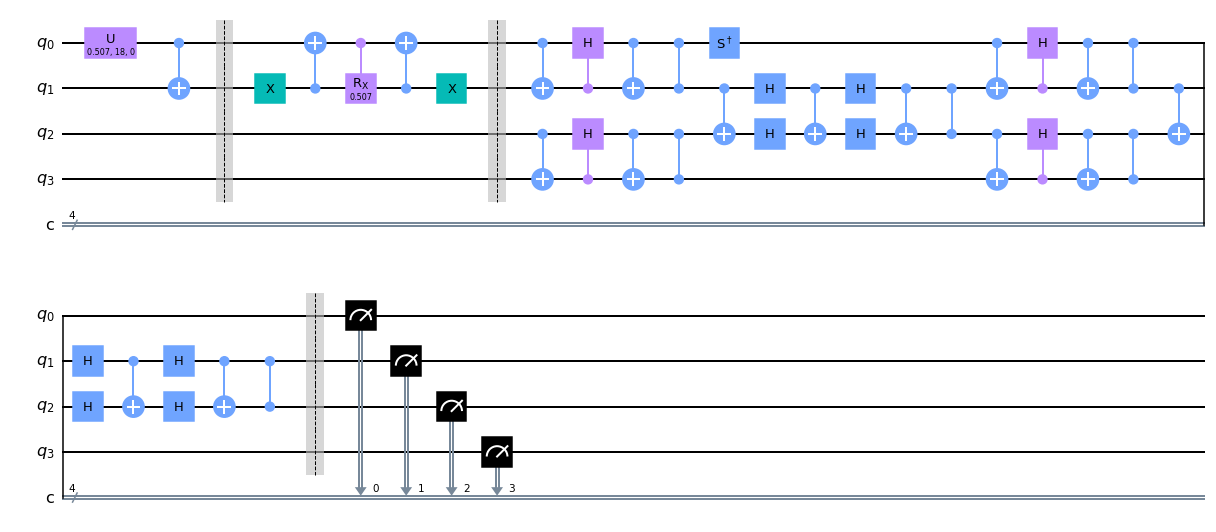

In [14]:
Isex_time.draw("mpl")

<Figure size 432x288 with 0 Axes>

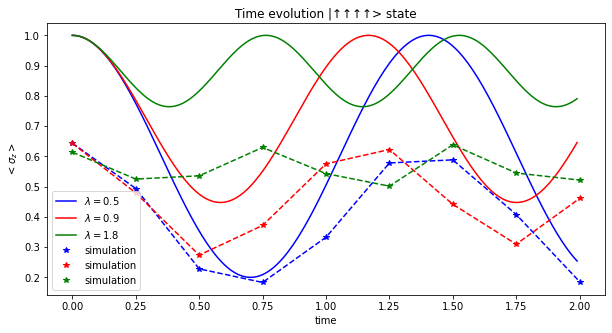

<Figure size 432x288 with 0 Axes>

In [58]:
# use local simulator
shots = 1024
sim_noise = AerSimulator(noise_model=noise_bit_flip)
# We compute the time evolution for lambda=0.5,0.9 and 1.8
nlam=3
magt_sim=[[] for _ in range(nlam)]
lam0=[0.5,0.9,1.8]
for j in range(nlam):
    lam=lam0[j]
    for i in range(9):
        q = QuantumRegister(4, "q")
        c = ClassicalRegister(4, "c")
        Udis = QuantumCircuit(q, c)
        # Udis.draw("mpl")
        # plt.show()
        ini = QuantumCircuit(q, c)
        mes = QuantumCircuit(q, c)
        Isex_time = QuantumCircuit(q, c)

        t = i * 0.25

        Ising_time(Isex_time, ini, Udis, mes, lam, t, q[0], q[1], q[2], q[3], c[0], c[1], c[2], c[3])

        circ_tnoise = transpile(Isex_time, sim_noise)
        result_bit_flip = sim_noise.run(circ_tnoise).result()
        counts = result_bit_flip.get_counts()

        r1 = list(counts.keys())
        r2 = list(counts.values())
        M = 0
        for k in range(0, len(r1)):
            M = M + (4 - 2 * digit_sum(r1[k])) * r2[k] / shots
        magt_sim[j].append(M / 4)

vexact_t = np.vectorize(exact_time)
plot_Time_evolution_all_up_state(vexact_t, magt_sim)